In [2]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
df_neg1 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_-1.csv', delimiter=';')
df_0 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_0.csv', delimiter=';')
df_1 = pd.read_csv('/users/eleves-a/2023/jules.frealle/Documents/IMC/2025_data_bottles1/prices_round_2_day_1.csv', delimiter=';')

In [4]:
df_neg1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-1,999900,DJEMBES,13493,76,NaN,NaN,NaN,NaN,13494,76,NaN,NaN,NaN,NaN,13493.5,0.0
79996,-1,999900,KELP,2028,31,NaN,NaN,NaN,NaN,2030,6,2031.0,31.0,NaN,NaN,2029.0,0.0
79997,-1,999900,RAINFOREST_RESIN,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
79998,-1,999900,PICNIC_BASKET1,59222,2,59221.0,13.0,59220.0,27.0,59231,2,59232.0,13.0,59233.0,27.0,59226.5,0.0


In [5]:
croissant_df = df_1.loc[df_1['product']=='CROISSANTS'].copy()
jams_df = df_1.loc[df_1['product']=='JAMS'].copy()
djembes_df = df_1.loc[df_1['product']=='DJEMBES'].copy()
picnic1_df = df_1.loc[df_1['product']=='PICNIC_BASKET1'].copy()
picnic2_df = df_1.loc[df_1['product']=='PICNIC_BASKET2'].copy()

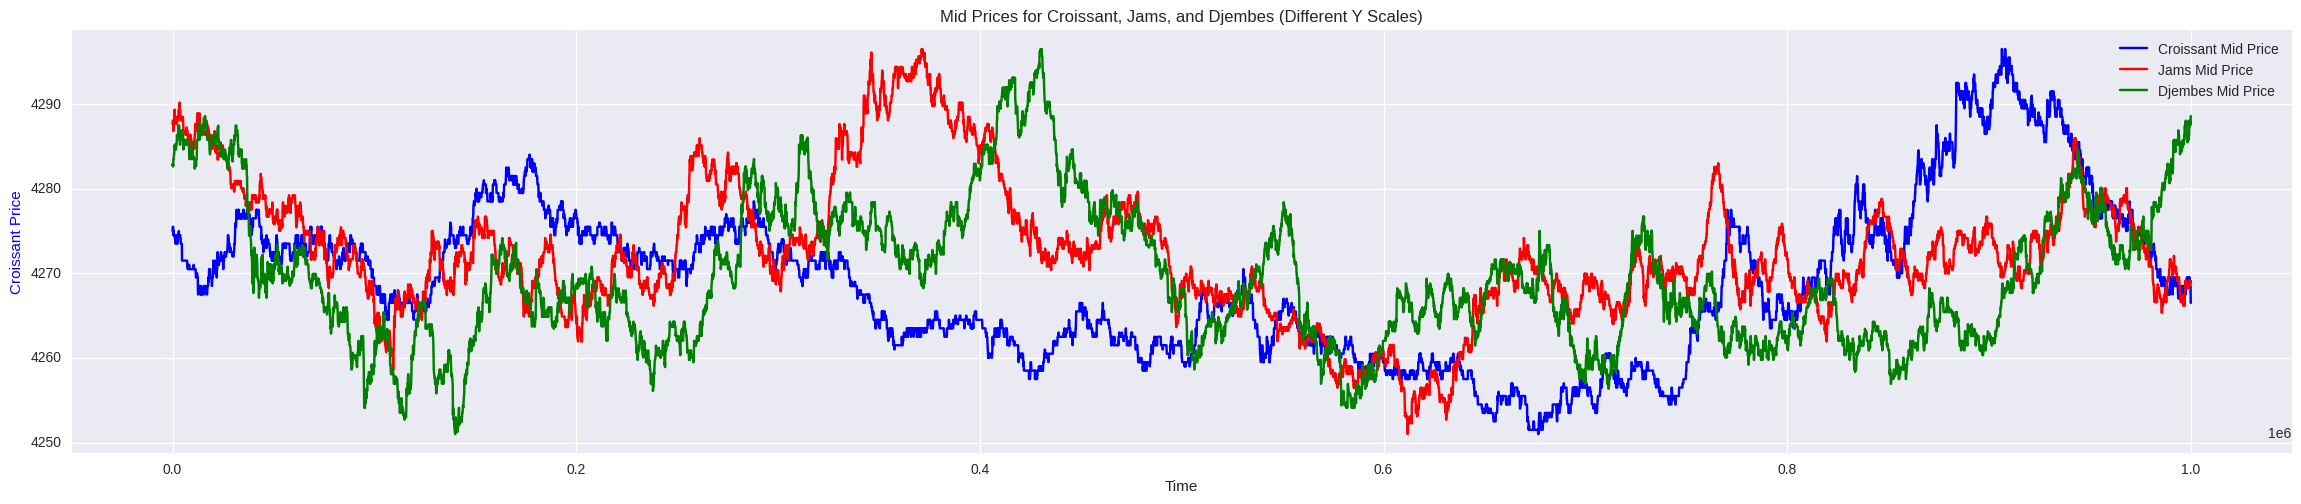

In [6]:
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/indexes/base.py:3802, in Index.get_loc(self, key, method, tolerance)
   3801 try:
-> 3802     return self._engine.get_loc(casted_key)
   3803 except KeyError as err:

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/_libs/index.pyx:138, in pandas._libs.index.IndexEngine.get_loc()

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/_libs/index.pyx:165, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:5745, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:5753, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'croissant_zscore'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[35], line 65
     62 plt.show()
     64 plt.figure(figsize=(15, 4))
---> 65 plt.plot(merged_df['timestamp'], merged_df['croissant_zscore'], label='Croissant Z-score', color='orange')
     66 plt.axhline(0, color='gray', linestyle='--', linewidth=1)
     67 plt.title("Z-score of CROISSANTS over time")

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/frame.py:3807, in DataFrame.__getitem__(self, key)
   3805 if self.columns.nlevels > 1:
   3806     return self._getitem_multilevel(key)
-> 3807 indexer = self.columns.get_loc(key)
   3808 if is_integer(indexer):
   3809     indexer = [indexer]

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/indexes/base.py:3804, in Index.get_loc(self, key, method, tolerance)
   3802     return self._engine.get_loc(casted_key)
   3803 except KeyError as err:
-> 3804     raise KeyError(key) from err
   3805 except TypeError:
   3806     # If we have a listlike key, _check_indexing_error will raise
   3807     #  InvalidIndexError. Otherwise we fall through and re-raise
   3808     #  the TypeError.
   3809     self._check_indexing_error(key)

KeyError: 'croissant_zscore'

<Figure size 1500x400 with 0 Axes>###################################################### DAY 1 ##########################################3333
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Define a helper to make spines invisible for parasite axes.
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# Create a host subplot.
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=2.9)

# Create two parasite y-axes.
par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.
par2.spines["right"].set_position(("axes", 1.5))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

# Plot each series on its own axis.
p1, = host.plot(croissant_df['timestamp'], croissant_df['mid_price'], label='Croissant Mid Price', color='blue')
p2, = par1.plot(jams_df['timestamp'], jams_df['mid_price'], label='Jams Mid Price', color='red')
p3, = par2.plot(djembes_df['timestamp'], djembes_df['mid_price'], label='Djembes Mid Price', color='green')

# Set axis labels
host.set_xlabel("Time")
host.set_ylabel("Croissant Price")
par1.set_ylabel("Jams Price")
par2.set_ylabel("Djembes Price")

# Adjust colors for y-axis tick labels
host.yaxis.label.set_color('blue')
par1.yaxis.label.set_color('red')
par2.yaxis.label.set_color('green')
host.tick_params(axis='y', colors='blue')
par1.tick_params(axis='y', colors='red')
par2.tick_params(axis='y', colors='green')

plt.title("Mid Prices for Croissant, Jams, and Djembes (Different Y Scales)")

# Add grid and legend. For the legend, combine all lines.
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines])

plt.show()

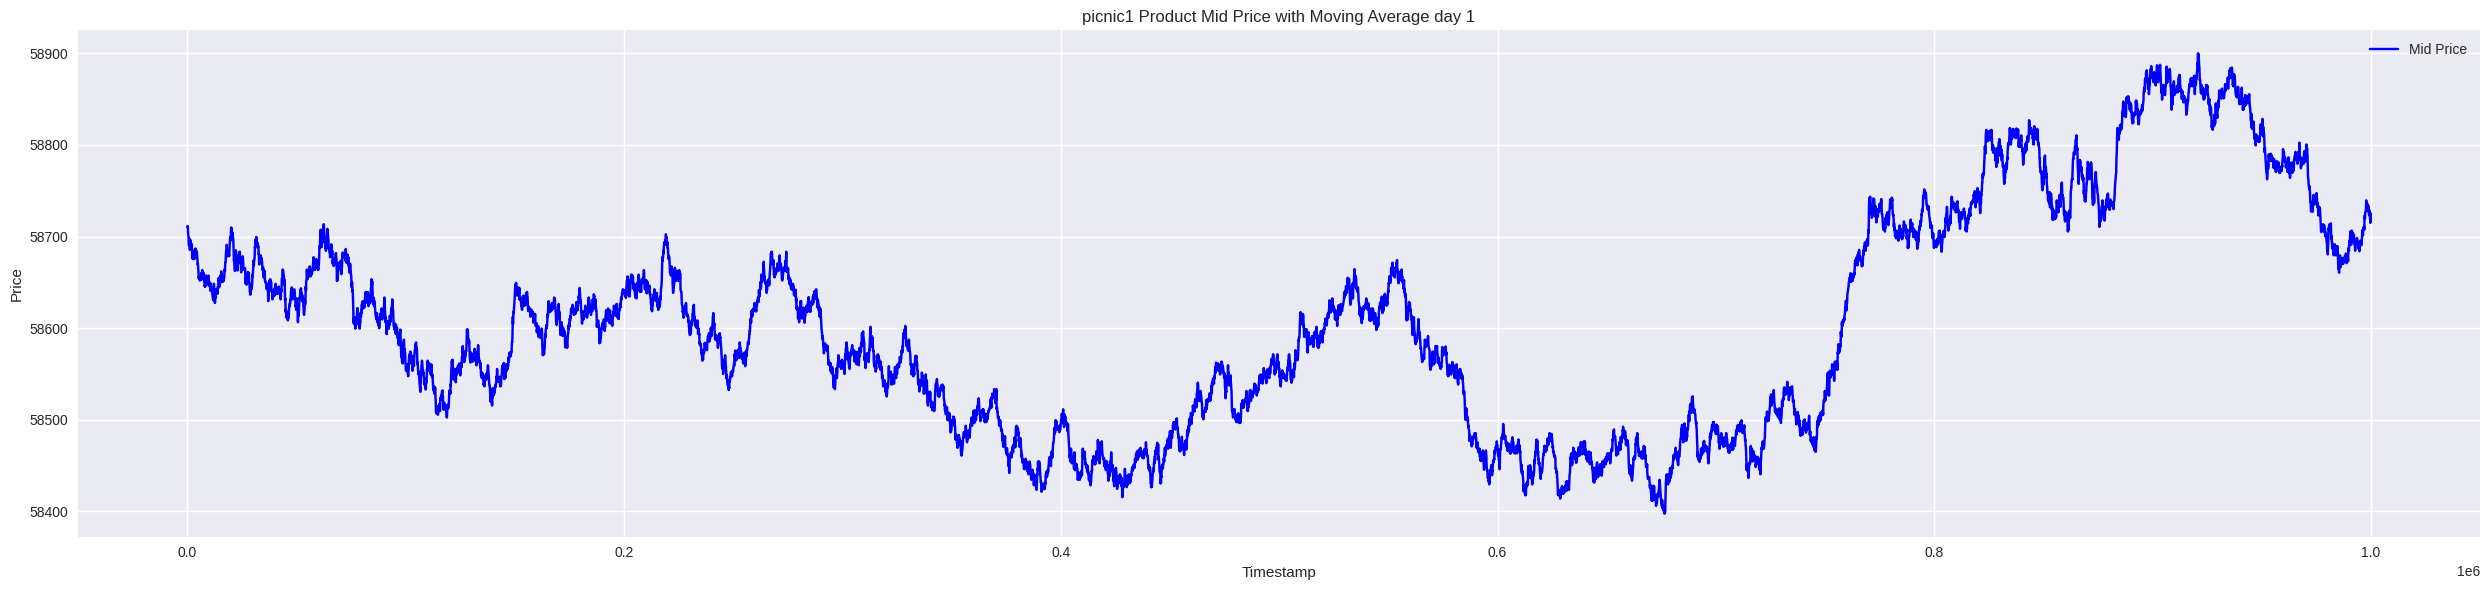

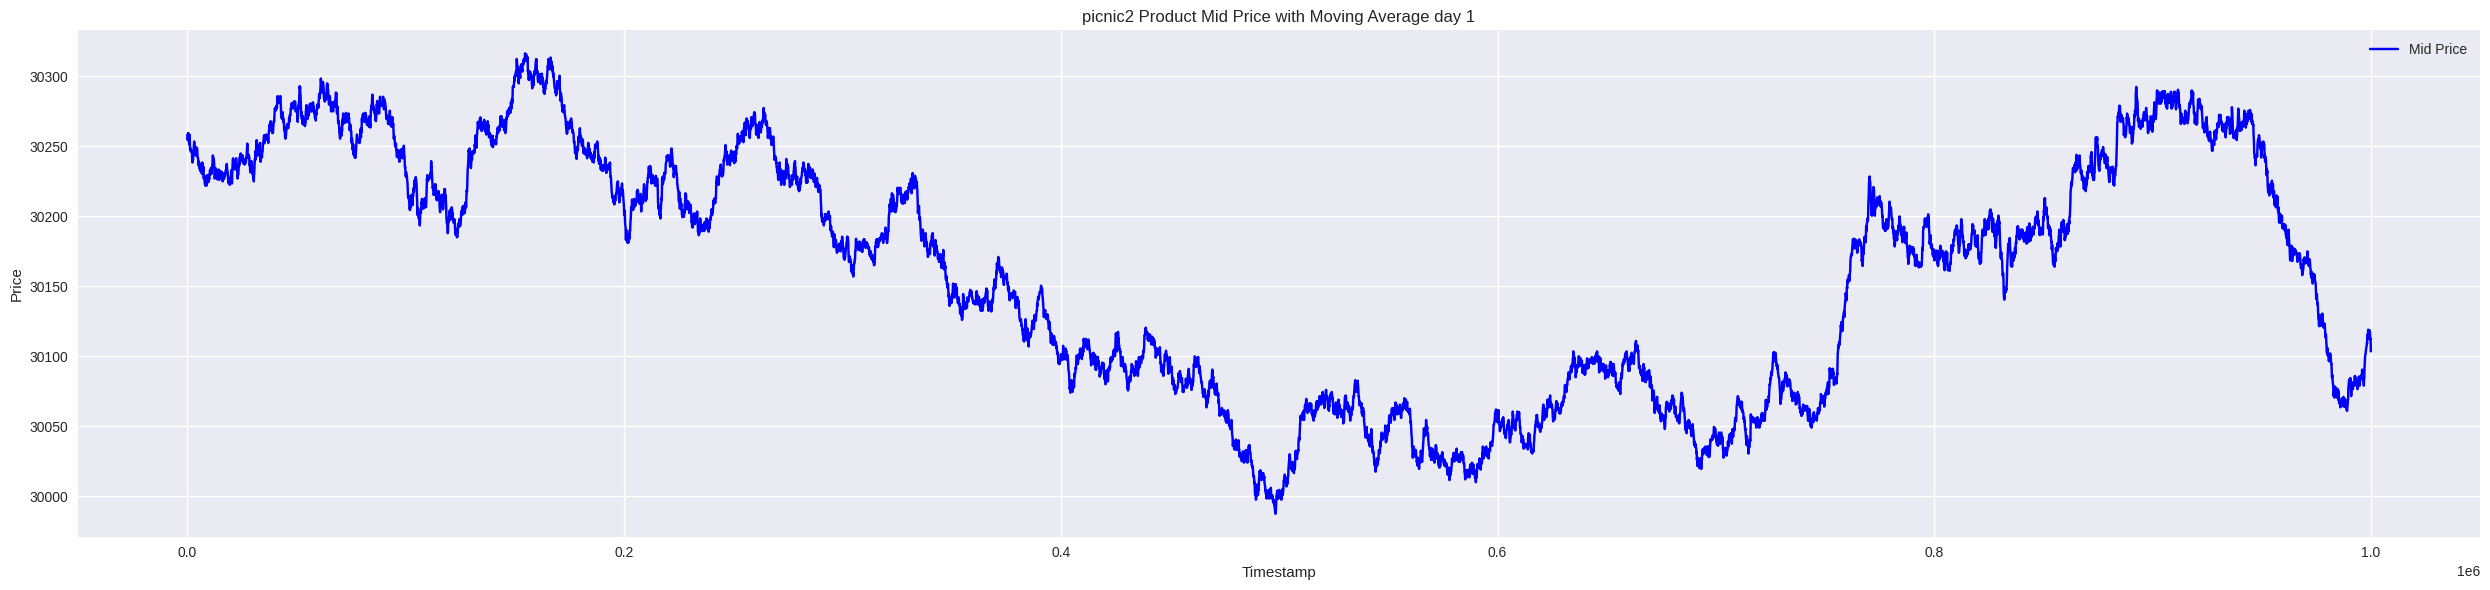

In [7]:
plt.figure(figsize=(25, 6))
plt.plot(picnic1_df['timestamp'], picnic1_df['mid_price'], label="Mid Price", linestyle='-', color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("picnic1 Product Mid Price with Moving Average day 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 6))
plt.plot(picnic2_df['timestamp'], picnic2_df['mid_price'], label="Mid Price", linestyle='-', color="blue")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("picnic2 Product Mid Price with Moving Average day 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitted Coefficients (NumPy least squares):
Intercept:  21070.817232252735
Coefficient for CROISSANTS:  10.98540512894312
Coefficient for DJEMBES:  -0.3863885753765873
Coefficient for JAMS:  -0.6423823434065075


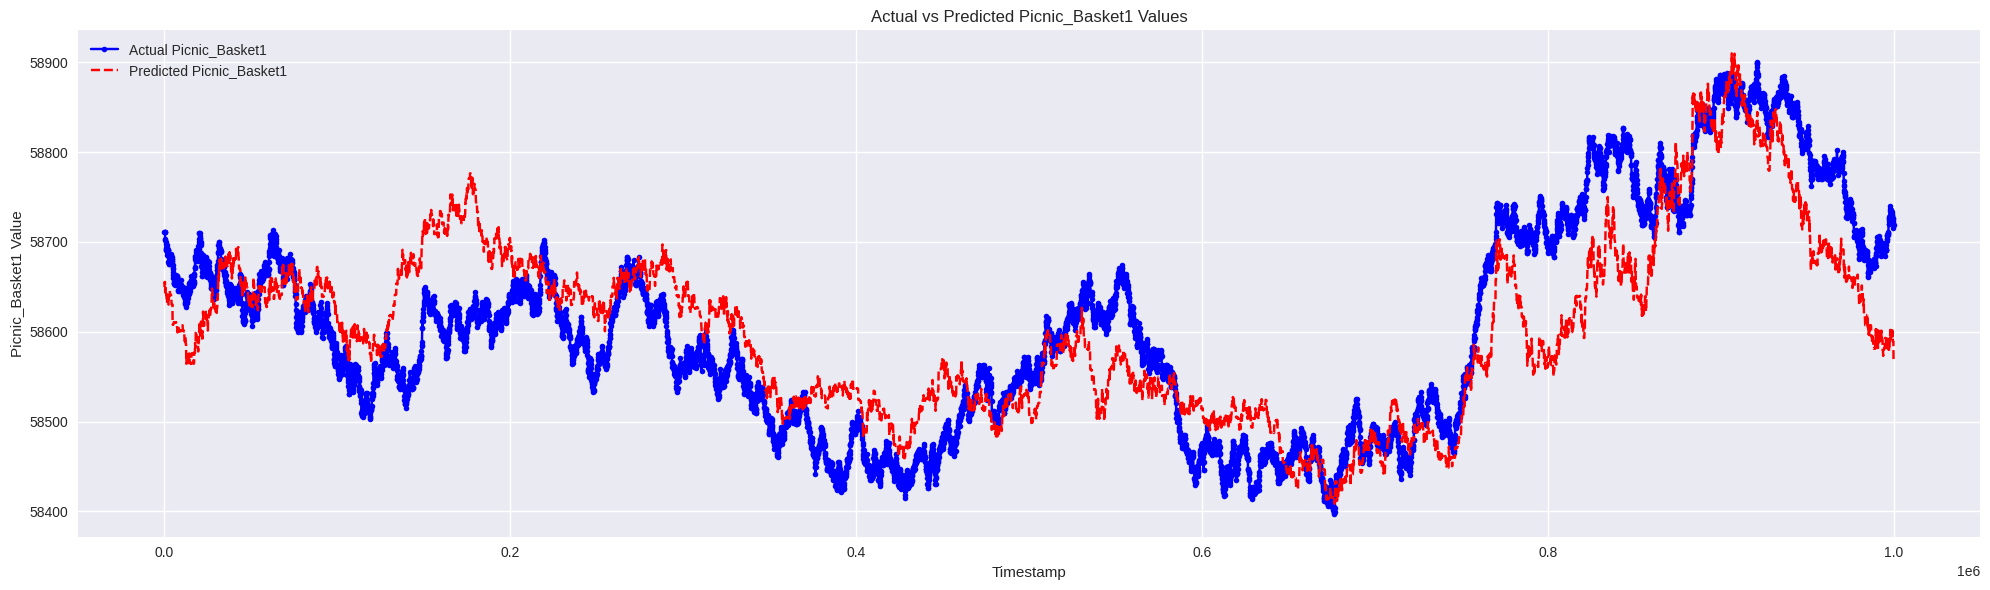

In [8]:
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/indexes/base.py:3802, in Index.get_loc(self, key, method, tolerance)
   3801 try:
-> 3802     return self._engine.get_loc(casted_key)
   3803 except KeyError as err:

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/_libs/index.pyx:138, in pandas._libs.index.IndexEngine.get_loc()

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/_libs/index.pyx:165, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:5745, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:5753, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'croissant_zscore'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[35], line 65
     62 plt.show()
     64 plt.figure(figsize=(15, 4))
---> 65 plt.plot(merged_df['timestamp'], merged_df['croissant_zscore'], label='Croissant Z-score', color='orange')
     66 plt.axhline(0, color='gray', linestyle='--', linewidth=1)
     67 plt.title("Z-score of CROISSANTS over time")

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/frame.py:3807, in DataFrame.__getitem__(self, key)
   3805 if self.columns.nlevels > 1:
   3806     return self._getitem_multilevel(key)
-> 3807 indexer = self.columns.get_loc(key)
   3808 if is_integer(indexer):
   3809     indexer = [indexer]

File /usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/pandas/core/indexes/base.py:3804, in Index.get_loc(self, key, method, tolerance)
   3802     return self._engine.get_loc(casted_key)
   3803 except KeyError as err:
-> 3804     raise KeyError(key) from err
   3805 except TypeError:
   3806     # If we have a listlike key, _check_indexing_error will raise
   3807     #  InvalidIndexError. Otherwise we fall through and re-raise
   3808     #  the TypeError.
   3809     self._check_indexing_error(key)

KeyError: 'croissant_zscore'

<Figure size 1500x400 with 0 Axes>croissant_df = df_1.loc[df_1['product']=='CROISSANTS'].copy()
jams_df = df_1.loc[df_1['product']=='JAMS'].copy()
djembes_df = df_1.loc[df_1['product']=='DJEMBES'].copy()
picnic1_df = df_1.loc[df_1['product']=='PICNIC_BASKET1'].copy()
picnic2_df = df_1.loc[df_1['product']=='PICNIC_BASKET2'].copy()

croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
picnic1_df = picnic1_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})

# Merge data on the timestamp (use inner join so only common timestamps are included)
merged_df = croissant_df.merge(jams_df, on='timestamp')\
                        .merge(djembes_df, on='timestamp')\
                        .merge(picnic1_df, on='timestamp')

# Drop any rows with missing data if necessary
merged_df = merged_df.dropna()

# Extract dependent variable (PICNIC_BASKET1 value) and independent variables.
y = merged_df['picnic1'].values
X = merged_df[['croissant', 'djembes', 'jams']].values

# Add a column of ones to X to fit an intercept term.
X_intercept = np.column_stack([np.ones(X.shape[0]), X])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict Picnic_Basket1 values
y_pred = model.predict(X)
# Use NumPy's least squares solver
coeffs, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=None)

print("Fitted Coefficients (NumPy least squares):")
print("Intercept: ", coeffs[0])
print("Coefficient for CROISSANTS: ", coeffs[1])
print("Coefficient for DJEMBES: ", coeffs[2])
print("Coefficient for JAMS: ", coeffs[3])

plt.figure(figsize=(20, 6))
plt.plot(merged_df['timestamp'], y, label='Actual Picnic_Basket1', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(merged_df['timestamp'], y_pred, label='Predicted Picnic_Basket1', color='red', marker='x', linestyle='--', markersize=4)
plt.xlabel("Timestamp")
plt.ylabel("Picnic_Basket1 Value")
plt.title("Actual vs Predicted Picnic_Basket1 Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'weighted'

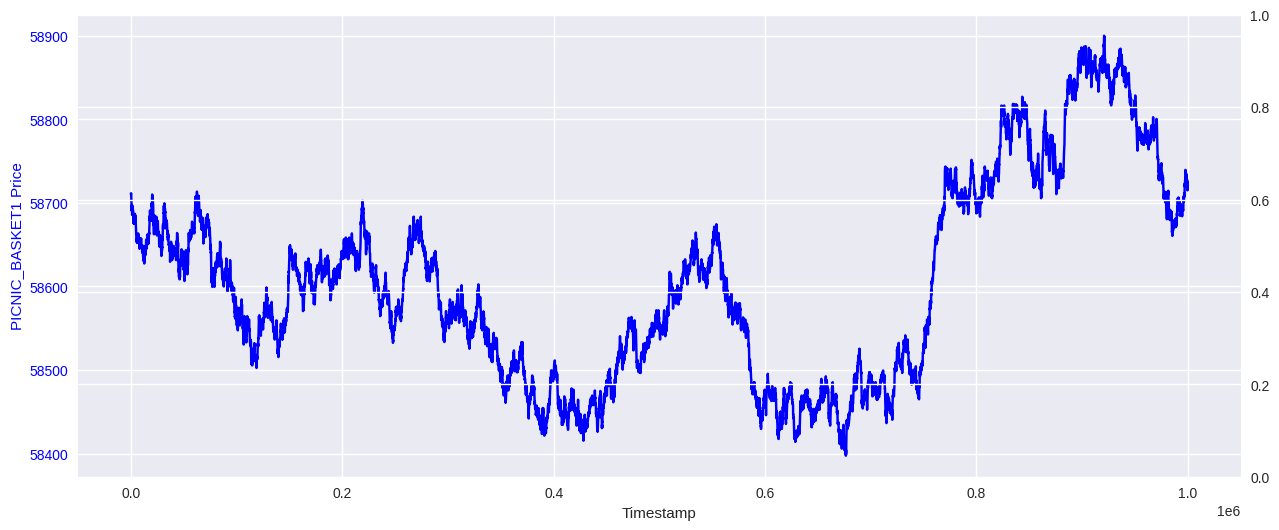

In [9]:
import matplotlib.pyplot as plt

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the PICNIC_BASKET1 series on the first y-axis
ax1.plot(merged_df['timestamp'], merged_df['picnic1'], label='PICNIC_BASKET1 Price', marker='x', linestyle='-', color='blue')
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("PICNIC_BASKET1 Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the weighted series on the second y-axis
ax2.plot(merged_df['timestamp'], merged_df['weighted'], label='Weighted Sum (6*CROISSANTS + 1*DJEMBES + 3*JAMS)', marker='x', linestyle='--', color='red')
ax2.set_ylabel("Weighted Sum", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optionally, add a title and grid, and combine legends:
plt.title("Comparison: PICNIC_BASKET1 Price vs Weighted Sum")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax1.grid(True)
fig.tight_layout()
plt.show()

In [ ]:
picnic1_df = df_0.loc[df_0['product'] == 'PICNIC_BASKET1'].copy()
croissant_df = df_0.loc[df_0['product'] == 'CROISSANTS'].copy()
djembes_df = df_0.loc[df_0['product'] == 'DJEMBES'].copy()
jams_df = df_0.loc[df_0['product'] == 'JAMS'].copy()

# Select only relevant columns and rename them for clarity
picnic1_df = picnic1_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge the dataframes on 'timestamp'
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')

# Drop any rows with missing data
merged_df = merged_df.dropna()

# Compute the weighted linear combination: 6 * CROISSANTS + 1 * DJEMBES + 3 * JAMS
merged_df['weighted'] = 6 * merged_df['croissant'] + 1 * merged_df['djembes'] + 3 * merged_df['jams']
merged_df['spread'] = merged_df['picnic1'] - merged_df['weighted']
print(merged_df['spread'].mean())
merged_df['mean'] = merged_df['spread'].mean()

plt.plot(merged_df['timestamp'], merged_df['spread'], label='PICNIC_BASKET1 (spread)', marker='x', linestyle='-')
plt.plot(merged_df['timestamp'], merged_df['mean'], label='PICNIC_BASKET1 (spread)', marker='x', linestyle='-')


In [ ]:
merged_df['rolling_std'] = merged_df['spread'].rolling(window=45, min_periods = 1).std()
merged_df['zscore'] = (merged_df['spread'] - merged_df['mean']) / merged_df['rolling_std']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Spread on the primary y-axis
color_spread = 'tab:blue'
ax1.set_xlabel('Index')  # or 'Timestamp'
ax1.set_ylabel('Spread', color=color_spread)
ax1.plot(merged_df.index, merged_df['spread'], color=color_spread, label='Spread')
ax1.tick_params(axis='y', labelcolor=color_spread)
ax1.grid(True)

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color_zscore = 'tab:purple'
ax2.set_ylabel('Z Score', color=color_zscore)
#ax2.plot(merged_df.index, merged_df['zscore'], color=color_zscore, label='Z Score')
ax2.plot(merged_df.index, merged_df['zscore'], color='red', label='Z Score')
ax2.tick_params(axis='y', labelcolor=color_zscore)


# Optional horizontal lines for ±7 thresholds on the z-score
ax2.axhline(y=7, color='green', linestyle='--', label='Z=7')
ax2.axhline(y=-7, color='red', linestyle='--', label='Z=-7')
ax2.axhline(y=20, color='red', linestyle='--', label='Z=20')
ax2.axhline(y=-20, color='red', linestyle='--', label='Z=-20')

# Add a title
plt.title('Spread and Z-Score Over Time')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

   timestamp  picnic1_z  weighted_z
0          0   0.895479    1.656820
1        100   0.895479    1.676789
2        200   0.903927    1.703414
3        300   0.895479    1.676789
4        400   0.836347    1.643507


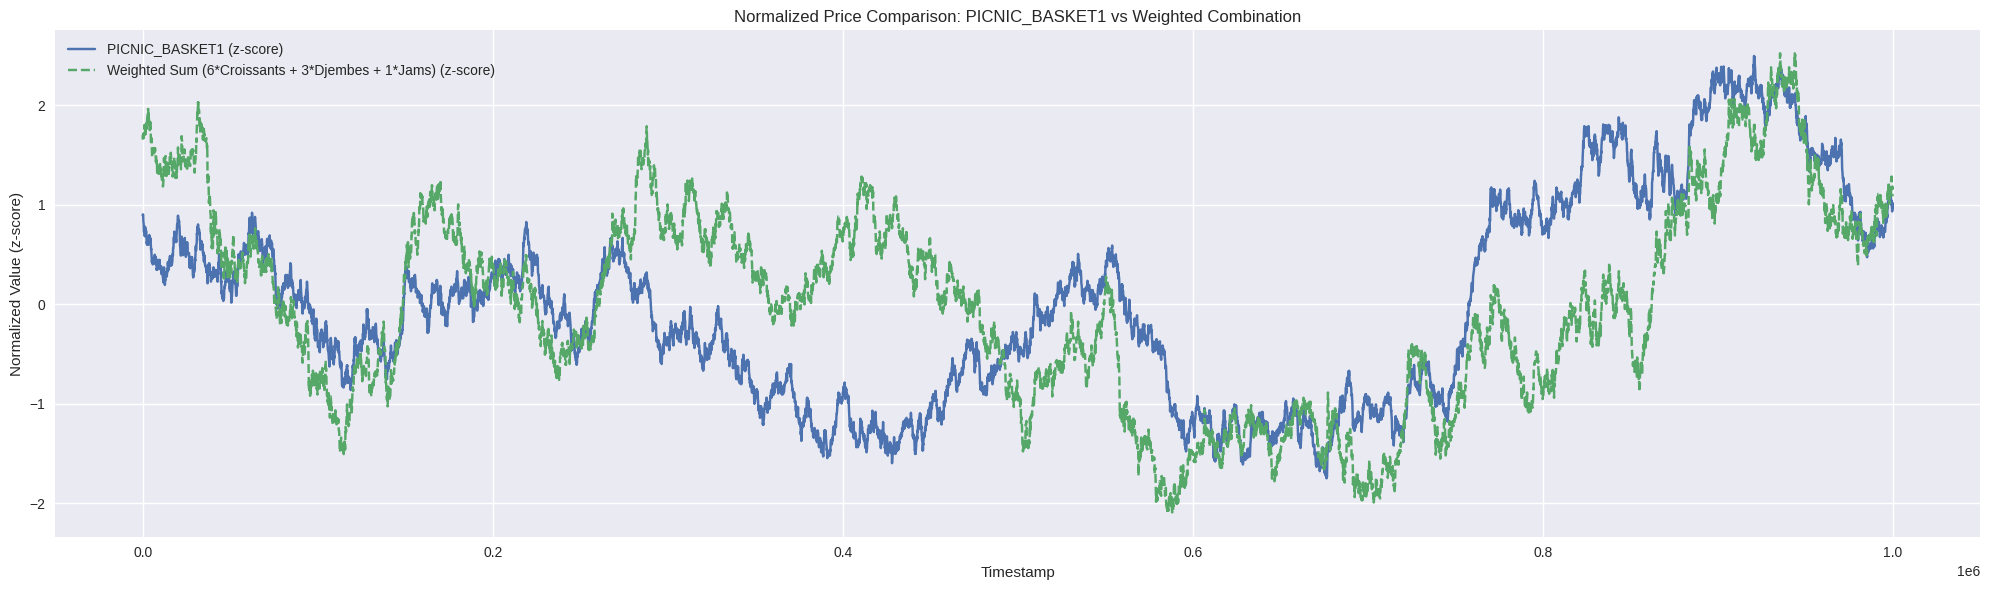

In [10]:
picnic1_df = df_1.loc[df_1['product'] == 'PICNIC_BASKET1'].copy()
croissant_df = df_1.loc[df_1['product'] == 'CROISSANTS'].copy()
djembes_df = df_1.loc[df_1['product'] == 'DJEMBES'].copy()
jams_df = df_1.loc[df_1['product'] == 'JAMS'].copy()

# Select only relevant columns and rename them for clarity
picnic1_df = picnic1_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge the dataframes on 'timestamp'
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')

# Drop any rows with missing data
merged_df = merged_df.dropna()

# Compute the weighted linear combination: 6 * CROISSANTS + 3 * DJEMBES + 1 * JAMS
merged_df['weighted'] = 6 * merged_df['croissant'] + 3 * merged_df['djembes'] + 1 * merged_df['jams']

# --- Normalize using z-score ---
merged_df['picnic1_z'] = (merged_df['picnic1'] - merged_df['picnic1'].mean()) / merged_df['picnic1'].std()
merged_df['weighted_z'] = (merged_df['weighted'] - merged_df['weighted'].mean()) / merged_df['weighted'].std()

# Print a few rows to inspect the normalized values
print(merged_df[['timestamp', 'picnic1_z', 'weighted_z']].head())

# Plot the normalized series on the same graph
plt.figure(figsize=(20, 6))
plt.plot(merged_df['timestamp'], merged_df['picnic1_z'], label='PICNIC_BASKET1 (z-score)', marker='x', linestyle='-')
plt.plot(merged_df['timestamp'], merged_df['weighted_z'], label='Weighted Sum (6*Croissants + 3*Djembes + 1*Jams) (z-score)', marker='x', linestyle='--')
plt.xlabel("Timestamp")
plt.ylabel("Normalized Value (z-score)")
plt.title("Normalized Price Comparison: PICNIC_BASKET1 vs Weighted Combination")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

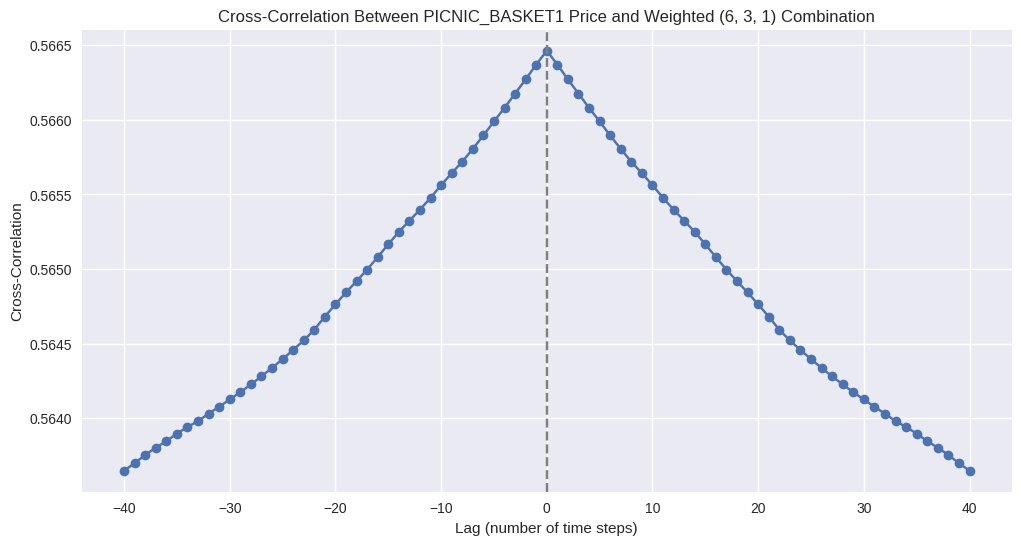

In [11]:
merged_df['weighted'] = 6 * merged_df['croissant'] + 3 * merged_df['djembes'] + 1 * merged_df['jams']

# Drop any NaN rows (if they exist)
merged_df = merged_df.dropna()

# Create a function to calculate cross-correlation at various lags.
def compute_cross_correlation(series1, series2, max_lag):
    lags = np.arange(-max_lag, max_lag+1)
    corr_vals = []
    for lag in lags:
        if lag < 0:
            s1 = series1[:lag]
            s2 = series2[-lag:]
        elif lag > 0:
            s1 = series1[lag:]
            s2 = series2[:-lag]
        else:
            s1 = series1
            s2 = series2
        corr_vals.append(s1.corr(s2))
    return lags, corr_vals

# Choose a maximum lag (in terms of row shifts).
max_lag = 40  # Adjust this based on your data frequency

lags, correlations = compute_cross_correlation(merged_df['picnic1'], merged_df['weighted'], max_lag)

# Plot the cross-correlation function
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations, marker='o')
plt.xlabel("Lag (number of time steps)")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation Between PICNIC_BASKET1 Price and Weighted (6, 3, 1) Combination")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

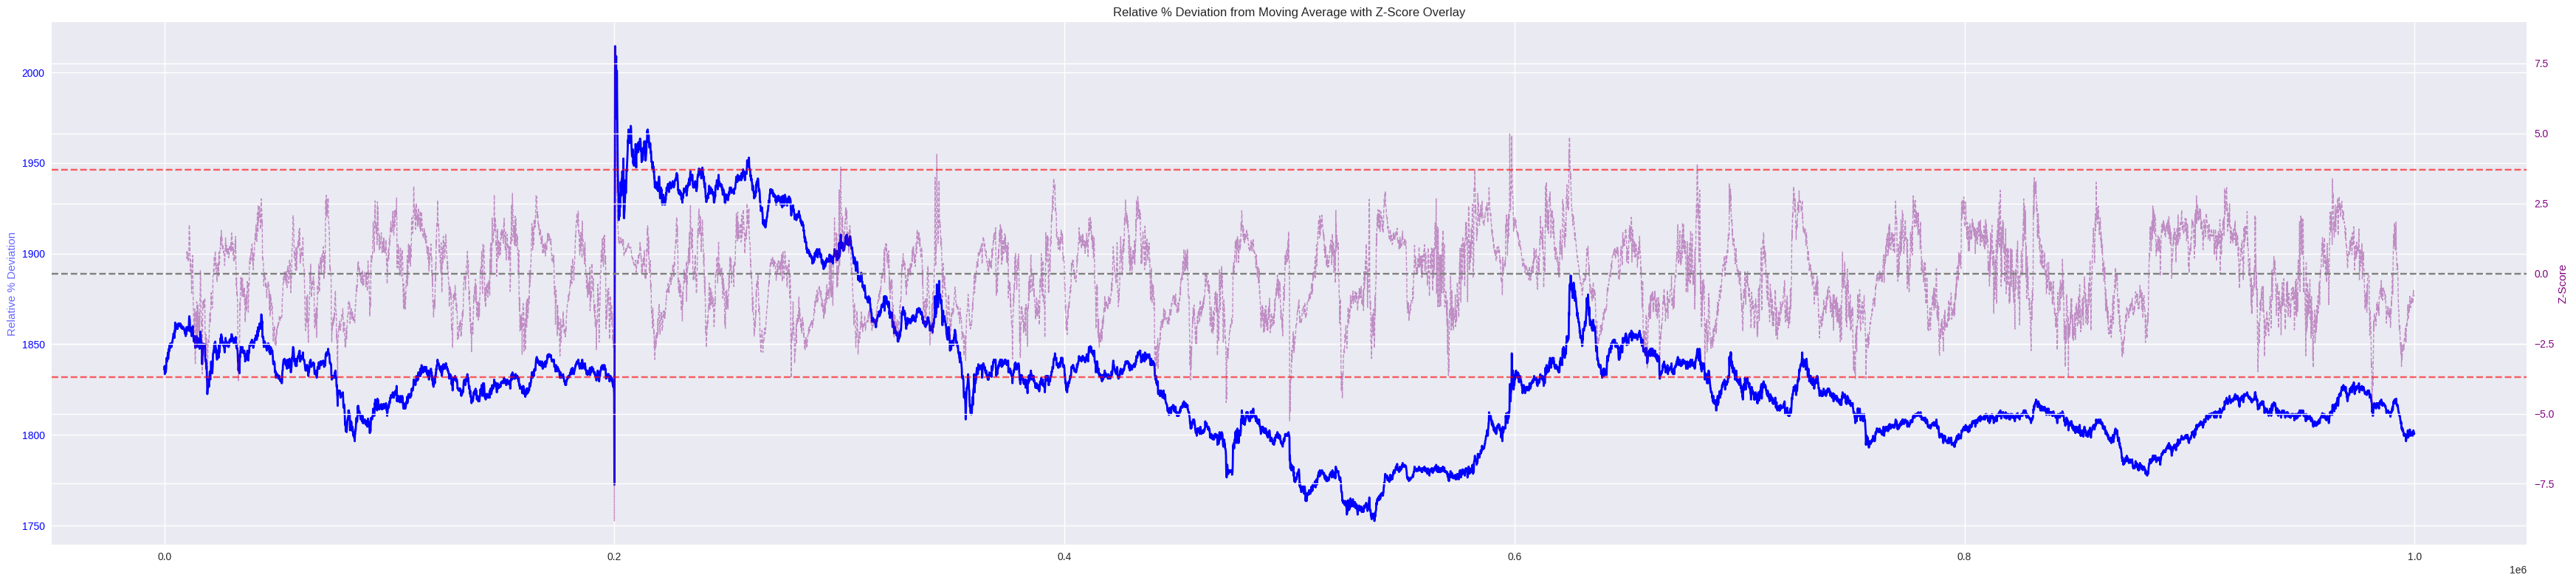

In [12]:
SQUID_INK_df = df_1.loc[df_1['product']=='SQUID_INK'].copy()
window = 100  # rolling window

# === Compute mid price, moving average, std, and percentage deviation ===
SQUID_INK_df['mid_price'] = (SQUID_INK_df['ask_price_1'] + SQUID_INK_df['bid_price_1']) / 2
SQUID_INK_df['ma'] = SQUID_INK_df['mid_price'].rolling(window).mean()
SQUID_INK_df['std'] = SQUID_INK_df['mid_price'].rolling(window).std()
SQUID_INK_df['z_score'] = (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['std']
SQUID_INK_df['relative_diff'] = 100 * (SQUID_INK_df['mid_price'] - SQUID_INK_df['ma']) / SQUID_INK_df['ma']

# === Plot: Relative % Deviation and Z-score ===
fig, ax1 = plt.subplots(figsize=(35, 8))

# Z-score (background)
ax2 = ax1.twinx()
ax2.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['z_score'], label='Z-Score',
         color='purple', linestyle='--', linewidth=1, alpha=0.4, zorder=1)
ax2.axhline(0, linestyle='--', color='gray', zorder=1)
ax2.axhline(3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.axhline(-3.7, linestyle='--', color='red', alpha=0.6, zorder=1)
ax2.set_ylabel("Z-Score", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Relative % deviation (foreground)
ax1.plot(SQUID_INK_df['timestamp'], SQUID_INK_df['mid_price'],
         label='Relative % Difference from MA', color='blue', linewidth=2, zorder=2)
ax1.set_ylabel("Relative % Deviation", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

plt.title("Relative % Deviation from Moving Average with Z-Score Overlay")
fig.tight_layout()
plt.grid(True)
plt.show()

Spread mean over all days: 48.762433333333334


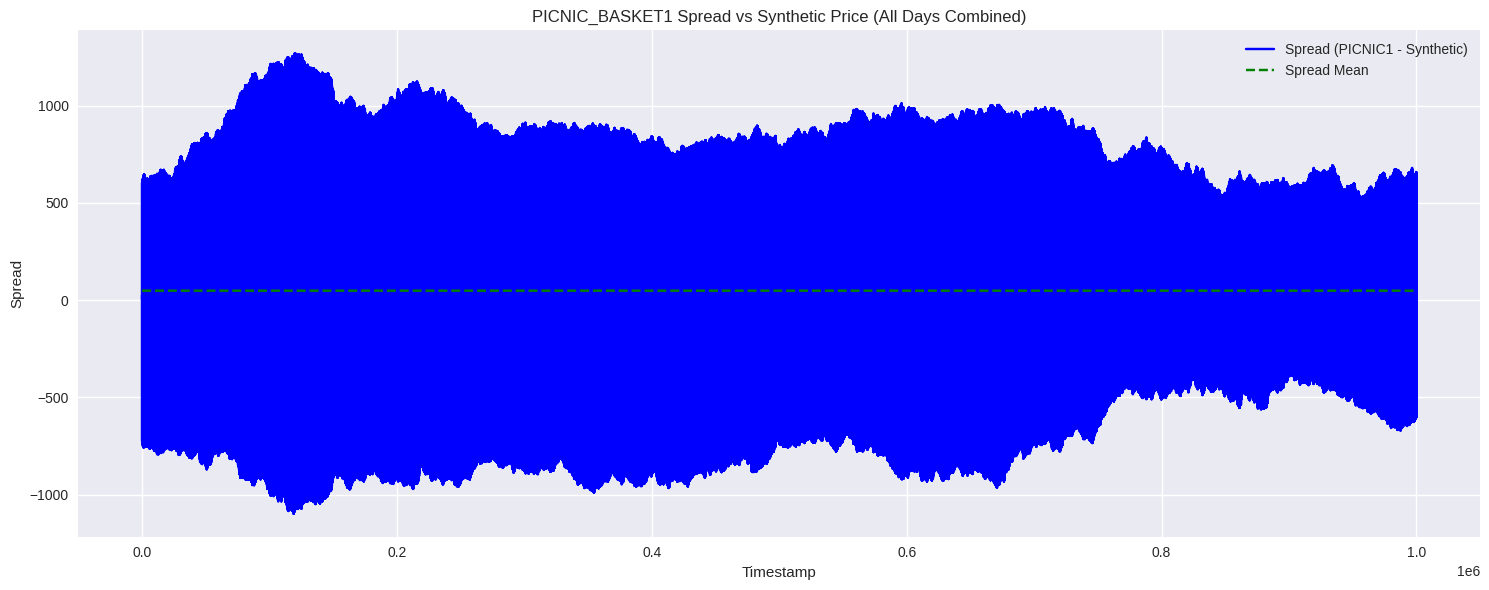

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine all your daily DataFrames into one
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)  # Add other days if needed

# Filter by product
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge on timestamp
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')\
                      .dropna()

# Calculate synthetic price and spread
merged_df['weighted'] = 6 * merged_df['croissant'] + 1 * merged_df['djembes'] + 3 * merged_df['jams']
merged_df['spread'] = merged_df['picnic1'] - merged_df['weighted']

# Compute overall spread mean
spread_mean = merged_df['spread'].mean()
print("Spread mean over all days:", spread_mean)

# Add mean line for plotting
merged_df['mean'] = spread_mean

# Plot
plt.figure(figsize=(15, 6))
plt.plot(merged_df['timestamp'], merged_df['spread'], label='Spread (PICNIC1 - Synthetic)', color='blue')
plt.plot(merged_df['timestamp'], merged_df['mean'], label='Spread Mean', color='green', linestyle='--')

plt.title("PICNIC_BASKET1 Spread vs Synthetic Price (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Spread mean over all days: 48.762433333333334


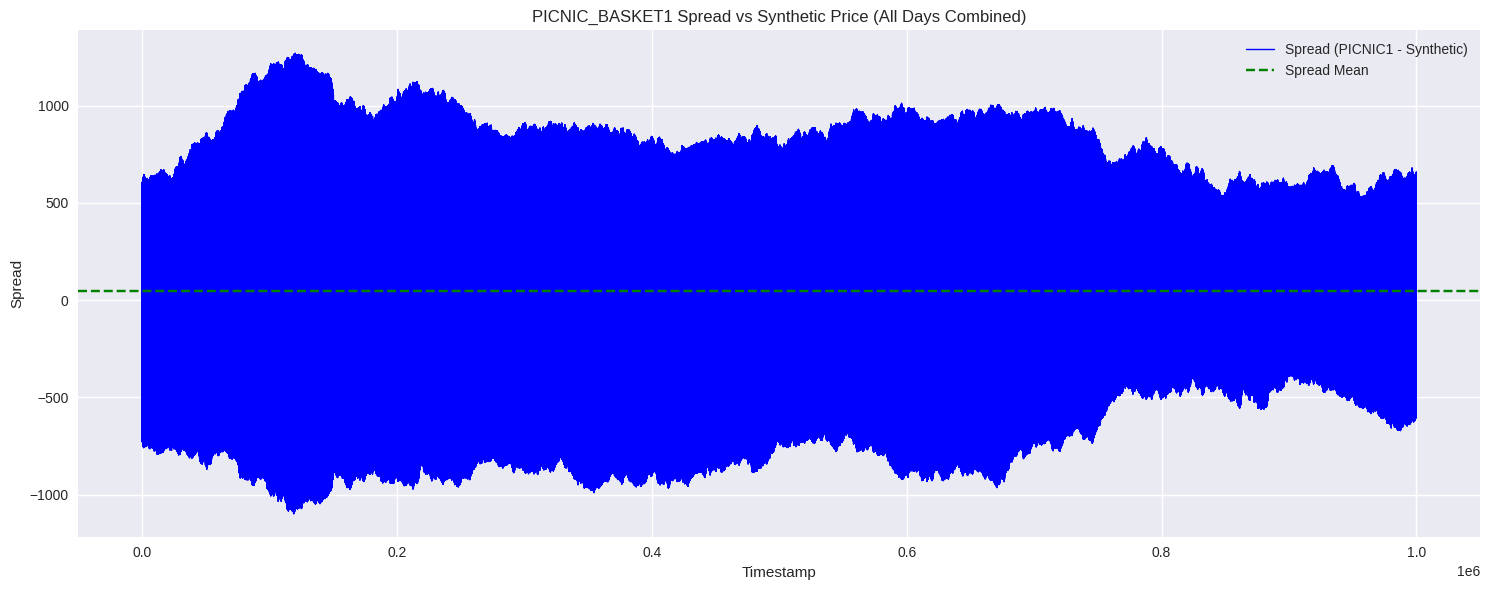

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic1_df.merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['weighted'] = (
    6 * merged_df['croissant'] +
    1 * merged_df['djembes'] +
    3 * merged_df['jams']
)
merged_df['spread'] = merged_df['picnic1'] - merged_df['weighted']

# Step 5: Compute and print overall spread mean
spread_mean = merged_df['spread'].mean()
print("Spread mean over all days:", spread_mean)

# Step 6: Plot spread and mean line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['spread'], label='Spread (PICNIC1 - Synthetic)', color='blue', linewidth=1)

# Draw mean as dashed horizontal line
plt.axhline(y=spread_mean, color='green', linestyle='--', label='Spread Mean')

plt.title("PICNIC_BASKET1 Spread vs Synthetic Price (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Spread mean over all days: 30.235966666666666


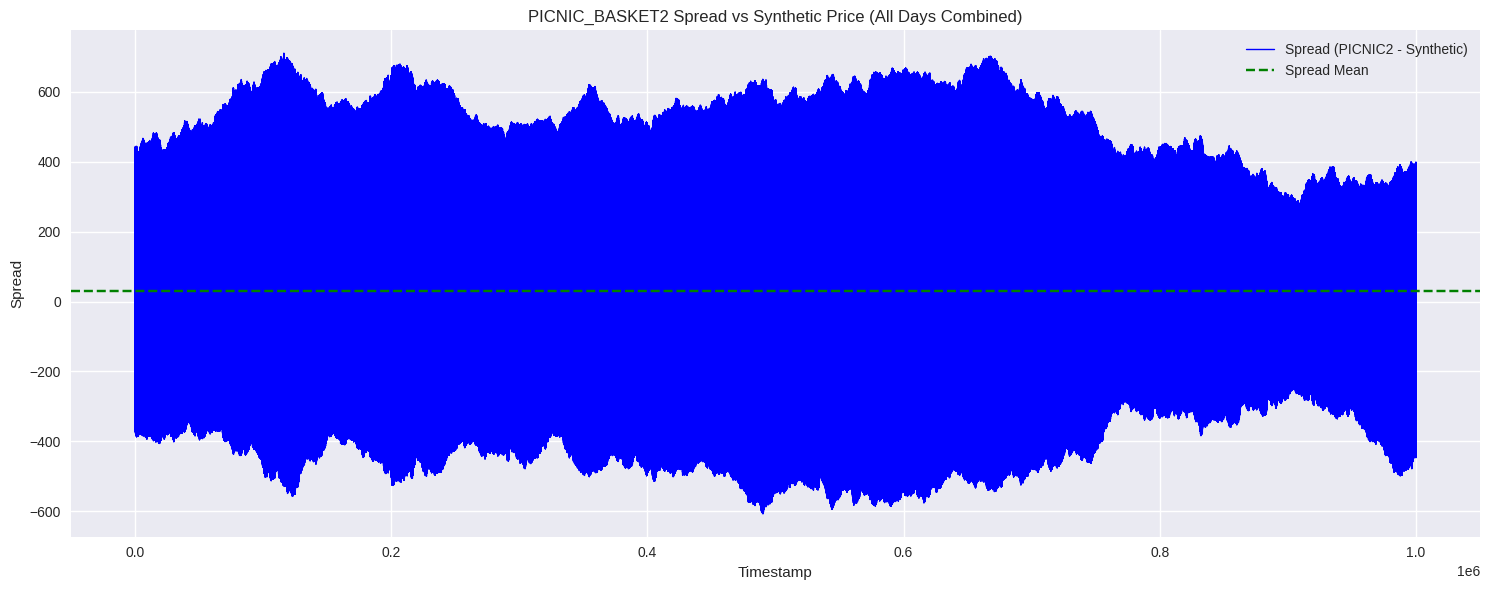

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['weighted'] = (
    4 * merged_df['croissant'] +
    0 * merged_df['djembes'] +
    2 * merged_df['jams']
)
merged_df['spread'] = merged_df['picnic2'] - merged_df['weighted']

# Step 5: Compute and print overall spread mean
spread_mean = merged_df['spread'].mean()
print("Spread mean over all days:", spread_mean)

# Step 6: Plot spread and mean line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['spread'], label='Spread (PICNIC2 - Synthetic)', color='blue', linewidth=1)

# Draw mean as dashed horizontal line
plt.axhline(y=spread_mean, color='green', linestyle='--', label='Spread Mean')

plt.title("PICNIC_BASKET2 Spread vs Synthetic Price (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

58.0801


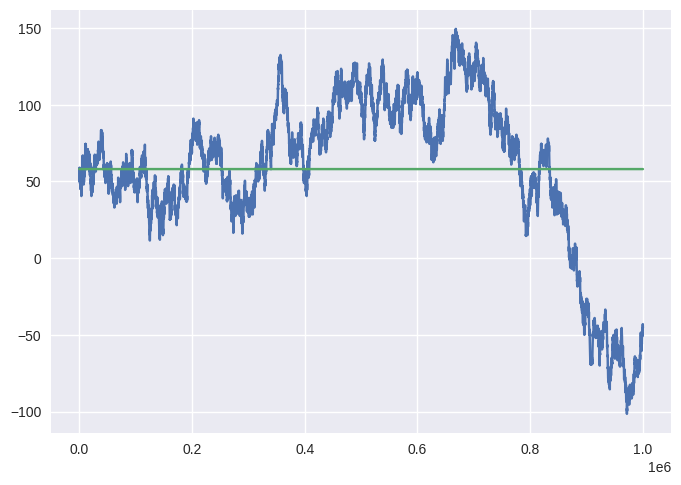

In [16]:
picnic2_df = df_neg1.loc[df_neg1['product'] == 'PICNIC_BASKET2'].copy()
croissant_df = df_neg1.loc[df_neg1['product'] == 'CROISSANTS'].copy()
djembes_df = df_neg1.loc[df_neg1['product'] == 'DJEMBES'].copy()
jams_df = df_neg1.loc[df_neg1['product'] == 'JAMS'].copy()

# Select only relevant columns and rename them for clarity
picnic2_df = picnic2_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
croissant_df = croissant_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = djembes_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = jams_df[['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Merge the dataframes on 'timestamp'
merged_df = picnic2_df.merge(croissant_df, on='timestamp', how='inner')\
                      .merge(djembes_df, on='timestamp', how='inner')\
                      .merge(jams_df, on='timestamp', how='inner')

# Drop any rows with missing data
merged_df = merged_df.dropna()

# Compute the weighted linear combination: 6 * CROISSANTS + 1 * DJEMBES + 3 * JAMS
merged_df['weighted'] = 4 * merged_df['croissant'] +0 * merged_df['djembes'] + 2 * merged_df['jams']
merged_df['spread'] = merged_df['picnic2'] - merged_df['weighted']
print(merged_df['spread'].mean())
merged_df['mean'] = merged_df['spread'].mean()

plt.plot(merged_df['timestamp'], merged_df['spread'], label='PICNIC_BASKET2 (spread)', marker='x', linestyle='-')
plt.plot(merged_df['timestamp'], merged_df['mean'], label='PICNIC_BASKET2 (spread)', marker='x', linestyle='-')



In [17]:
2 basket 1 merged_df['rolling_std'] = merged_df['spread'].rolling(window=45, min_periods = 1).std()
merged_df['zscore'] = (merged_df['spread'] - merged_df['mean']) / merged_df['rolling_std']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Spread on the primary y-axis
color_spread = 'tab:blue'
ax1.set_xlabel('Index')  # or 'Timestamp'
ax1.set_ylabel('Spread', color=color_spread)
ax1.plot(merged_df.index, merged_df['spread'], color=color_spread, label='Spread')
ax1.tick_params(axis='y', labelcolor=color_spread)
ax1.grid(True)

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color_zscore = 'tab:purple'
ax2.set_ylabel('Z Score', color=color_zscore)
#ax2.plot(merged_df.index, merged_df['zscore'], color=color_zscore, label='Z Score')
ax2.plot(merged_df.index, merged_df['zscore'], color='red', label='Z Score')
ax2.tick_params(axis='y', labelcolor=color_zscore)


# Optional horizontal lines for ±7 thresholds on the z-score
ax2.axhline(y=7, color='green', linestyle='--', label='Z=7')
ax2.axhline(y=-7, color='red', linestyle='--', label='Z=-7')
ax2.axhline(y=20, color='red', linestyle='--', label='Z=20')
ax2.axhline(y=-20, color='red', linestyle='--', label='Z=-20')

# Add a title
plt.title('Spread and Z-Score Over Time')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2878181945.py, line 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 5: Compute and print overall arbitrage spread mean
arbitrage_spread_mean = merged_df['arbitrage_spread'].mean()
print("Arbitrage Spread Mean over all days:", arbitrage_spread_mean)

# Step 6: Plot arbitrage spread and mean line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread'], label='Arbitrage Spread (2*BASKET2 - BASKET1)', color='blue', linewidth=1)

# Draw mean as dashed horizontal line
plt.axhline(y=arbitrage_spread_mean, color='green', linestyle='--', label='Arbitrage Spread Mean')

plt.title("Index Arbitrage Spread (2*BASKET2 - BASKET1) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


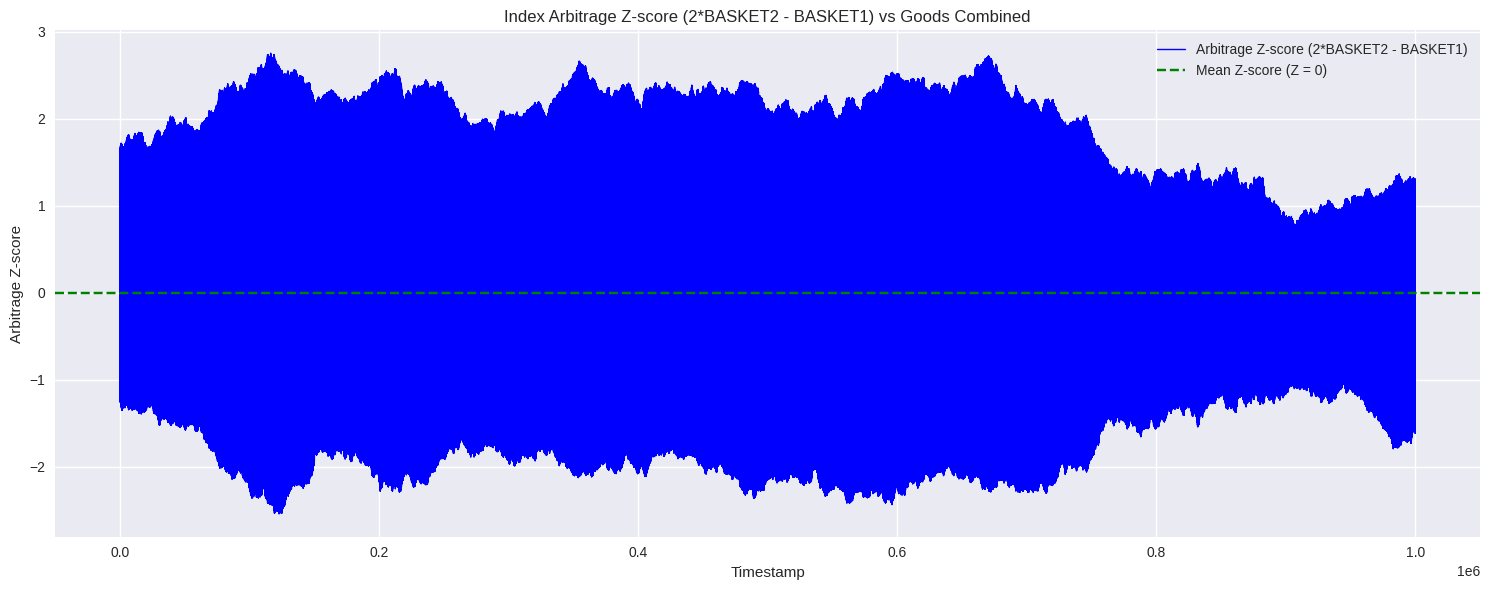

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4: Compute synthetic price and spread
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 5: Compute Z-score for the arbitrage spread
mean_spread = merged_df['arbitrage_spread'].mean()
std_spread = merged_df['arbitrage_spread'].std()
merged_df['arbitrage_zscore'] = (merged_df['arbitrage_spread'] - mean_spread) / std_spread

# Step 6: Plot arbitrage Z-score and mean Z-score line
plt.figure(figsize=(15, 6))

plt.plot(merged_df['timestamp'], merged_df['arbitrage_zscore'], label='Arbitrage Z-score (2*BASKET2 - BASKET1)', color='blue', linewidth=1)

# Draw mean Z-score as dashed horizontal line (Z = 0)
plt.axhline(y=0, color='green', linestyle='--', label='Mean Z-score (Z = 0)')

plt.title("Index Arbitrage Z-score (2*BASKET2 - BASKET1) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Arbitrage Spread (-3ASKET2 +2BASKET1) Mean: 6.816966666666667
Arbitrage Spread (Croissant -Jam) Mean: -2295.4746333333333


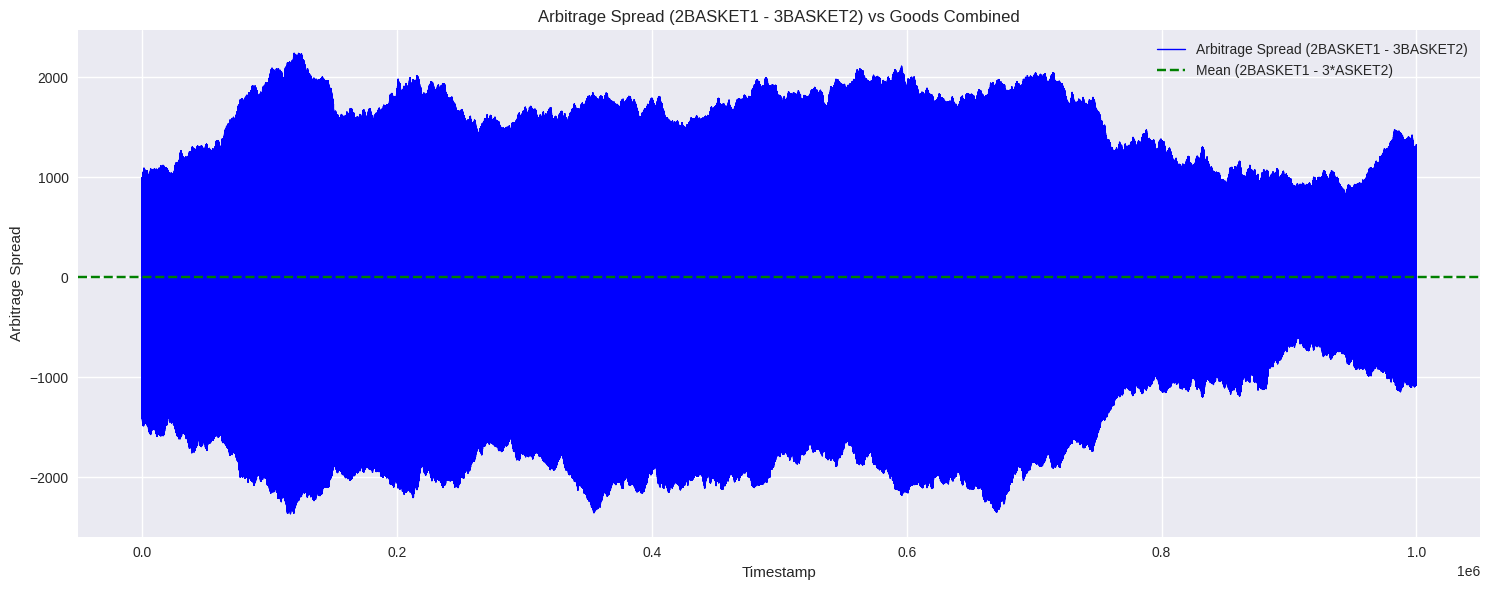

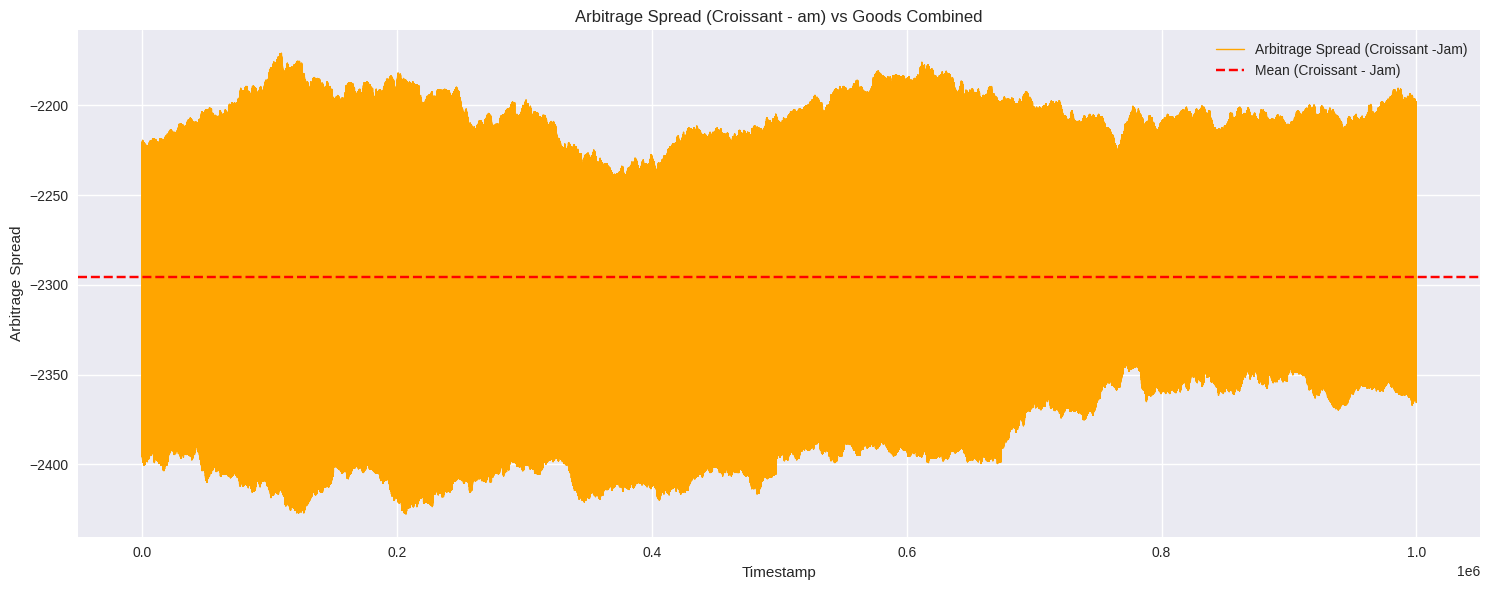

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Formula 1: Calculate Arbitrage Spread for 2*BASKET2 - 3*BASKET1 = 2*DJEMBE
merged_df['arbitrage_spread_basket1'] = (
    - 3 * merged_df['picnic2'] +
    2 * merged_df['picnic1'] -
    2 * merged_df['djembes']
)

# Formula 2: Correct Arbitrage Spread for Croissant + Jam (no multiplier for Croissant)
merged_df['arbitrage_spread_croissant_jam'] = (
    1 * merged_df['croissant'] - 
    1 * merged_df['jams']
)

# Step 5: Compute and print overall arbitrage spread means for both formulas
arbitrage_spread_basket1_mean = merged_df['arbitrage_spread_basket1'].mean()
arbitrage_spread_croissant_jam_mean = merged_df['arbitrage_spread_croissant_jam'].mean()

print("Arbitrage Spread (-3ASKET2 +2BASKET1) Mean:", arbitrage_spread_basket1_mean)
print("Arbitrage Spread (Croissant -Jam) Mean:", arbitrage_spread_croissant_jam_mean)

# Step 6: Plot 1 - Arbitrage Spread (2*BASKET2 - 3*BASKET1)
plt.figure(figsize=(15, 6))

# Plot Arbitrage Spread (2*BASKET2 - 3*BASKET1)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_basket1'], label='Arbitrage Spread (2BASKET1 - 3BASKET2)', color='blue', linewidth=1)
plt.axhline(y=arbitrage_spread_basket1_mean, color='green', linestyle='--', label='Mean (2BASKET1 - 3*ASKET2)')

plt.title("Arbitrage Spread (2BASKET1 - 3BASKET2) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot 2 - Arbitrage Spread (Croissant + Jam)
plt.figure(figsize=(15, 6))

# Plot Arbitrage Spread (Croissant + Jam)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_croissant_jam'], label='Arbitrage Spread (Croissant -Jam)', color='orange', linewidth=1)
plt.axhline(y=arbitrage_spread_croissant_jam_mean, color='red', linestyle='--', label='Mean (Croissant - Jam)')

plt.title("Arbitrage Spread (Croissant - am) vs Goods Combined")
plt.xlabel("Timestamp")
plt.ylabel("Arbitrage Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_922640/2436423611.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


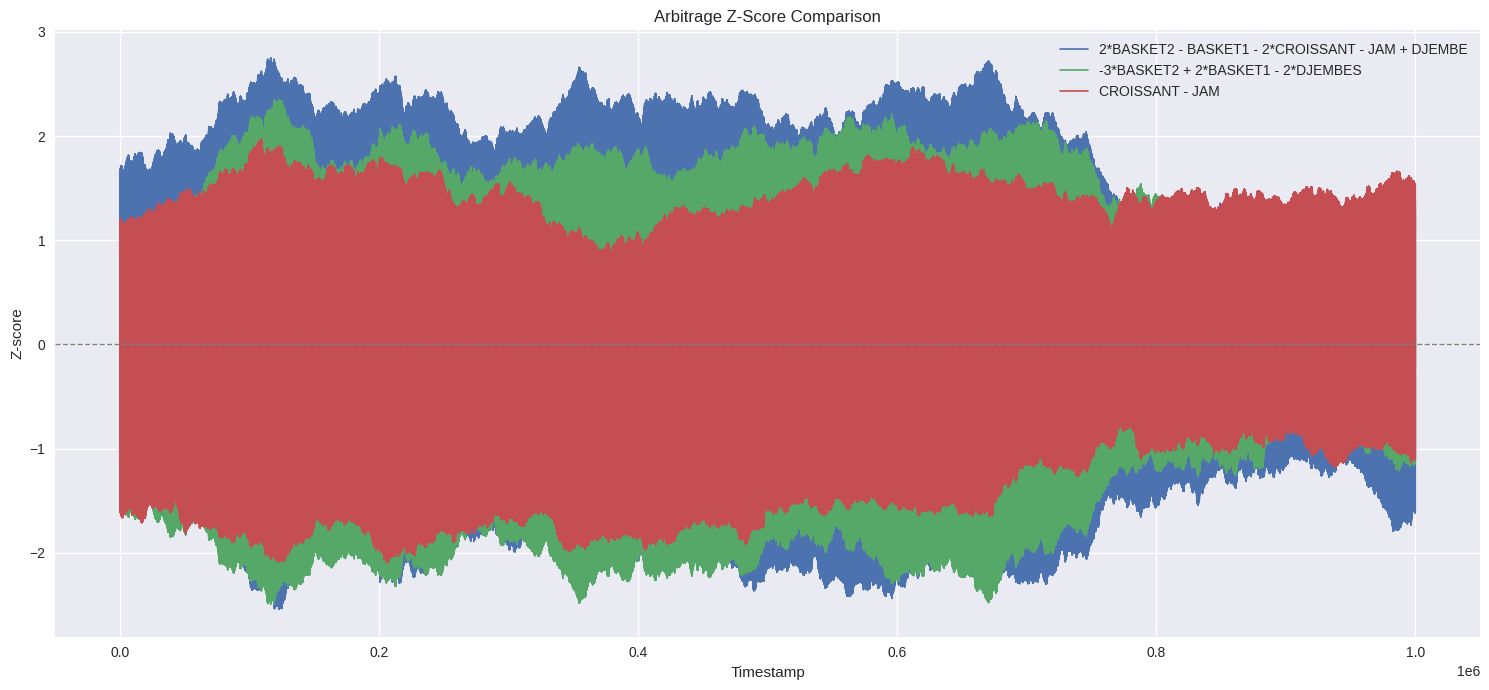

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Combine all days into one DataFrame
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename columns per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge all into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp', how='inner') \
                      .merge(croissant_df, on='timestamp', how='inner') \
                      .merge(djembes_df, on='timestamp', how='inner') \
                      .merge(jams_df, on='timestamp', how='inner') \
                      .dropna()

# Step 4a: Original Arbitrage Spread (combined goods vs baskets)
merged_df['arbitrage_spread'] = (
    2 * merged_df['picnic2'] -
    1 * merged_df['picnic1'] -
    2 * merged_df['croissant'] -
    1 * merged_df['jams'] +
    1 * merged_df['djembes']
)

# Step 4b: Arbitrage Spread between baskets
merged_df['arbitrage_spread_basket1'] = (
    - 3 * merged_df['picnic2'] +
    2 * merged_df['picnic1'] -
    2 * merged_df['djembes']
)

# Step 4c: Arbitrage between Croissant and Jam
merged_df['arbitrage_spread_croissant_jam'] = (
    merged_df['croissant'] - merged_df['jams']
)

# Step 5: Z-scores
for col in ['arbitrage_spread', 'arbitrage_spread_basket1', 'arbitrage_spread_croissant_jam']:
    z_col = col + '_zscore'
    mean = merged_df[col].mean()
    std = merged_df[col].std()
    merged_df[z_col] = (merged_df[col] - mean) / std

# Step 6: Plot all Z-scores together
plt.figure(figsize=(15, 7))
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_zscore'], label='2*BASKET2 - BASKET1 - 2*CROISSANT - JAM + DJEMBE', linewidth=1.2)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_basket1_zscore'], label='-3*BASKET2 + 2*BASKET1 - 2*DJEMBES', linewidth=1.2)
plt.plot(merged_df['timestamp'], merged_df['arbitrage_spread_croissant_jam_zscore'], label='CROISSANT - JAM', linewidth=1.2)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Arbitrage Z-Score Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


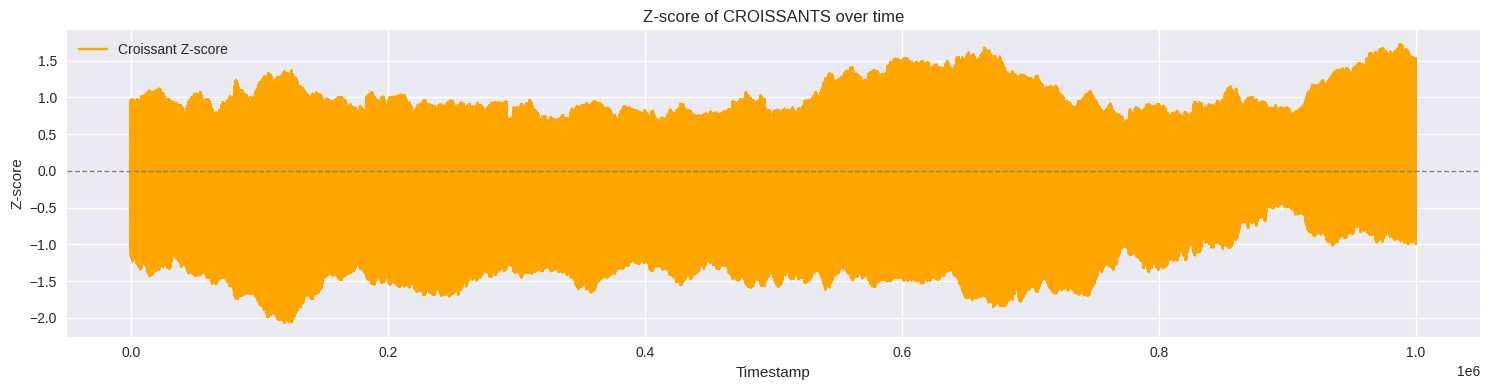

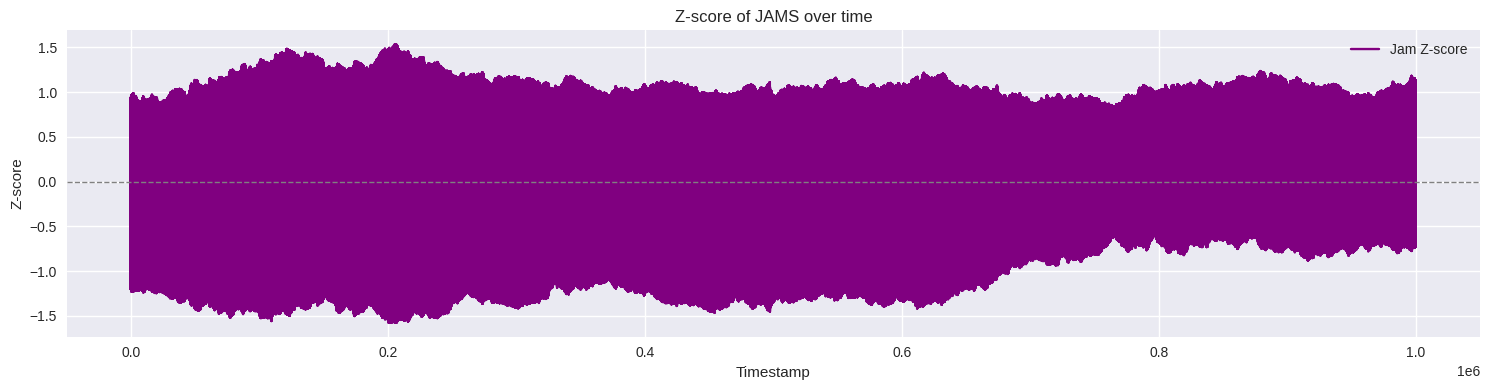

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os
window = 50
# Step 1: Combine all days
full_df = pd.concat([df_neg1, df_0, df_1], ignore_index=True)

# Step 2: Filter and rename per product
picnic2_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET2', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic2'})
picnic1_df = full_df.loc[full_df['product'] == 'PICNIC_BASKET1', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'picnic1'})
croissant_df = full_df.loc[full_df['product'] == 'CROISSANTS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'croissant'})
djembes_df = full_df.loc[full_df['product'] == 'DJEMBES', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'djembes'})
jams_df = full_df.loc[full_df['product'] == 'JAMS', ['timestamp', 'mid_price']].rename(columns={'mid_price': 'jams'})

# Step 3: Merge into one DataFrame on timestamp
merged_df = picnic2_df.merge(picnic1_df, on='timestamp') \
                      .merge(croissant_df, on='timestamp') \
                      .merge(djembes_df, on='timestamp') \
                      .merge(jams_df, on='timestamp')

# Step 4: Compute Z-scores for Croissant and Jam
merged_df['croissant_zscore'] = (merged_df['croissant'] - merged_df['croissant'].rolling(window).mean()) / merged_df['croissant'].std()
merged_df['jam_zscore'] = (merged_df['jams'] - merged_df['jams'].rolling(window).mean()) / merged_df['jams'].std()

# Step 5: Plot Croissant Z-score
plt.figure(figsize=(15, 4))
plt.plot(merged_df['timestamp'], merged_df['croissant_zscore'], label='Croissant Z-score', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Z-score of CROISSANTS over time")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Plot Jam Z-score
plt.figure(figsize=(15, 4))
plt.plot(merged_df['timestamp'], merged_df['jam_zscore'], label='Jam Z-score', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Z-score of JAMS over time")
plt.xlabel("Timestamp")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
